# Data Preprocessing - Parte 3 (Temporal Data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(file_path):
    """Load data from a CSV file into a pandas DataFrame."""
    try:
        data = pd.read_csv(file_path, sep=',')
        print("Data loaded successfully.")
        return data
    except Exception as e:
        print(f"An error occurred while loading the data: {e}")
        return None

def summarize_data(data):
    """Generate summary statistics of the DataFrame."""
    if data is not None:
        summary = data.describe()
        print("Data summary:")
        print(summary)
        return summary
    else:
        print("No data to summarize.")
        return None

In [3]:
data = load_data("../data/section_3/indicators_afg.csv")
summary = summarize_data(data)

Data loaded successfully.
Data summary:
       Country Name Country ISO3   Year Indicator Name Indicator Code  Value
count         59730        59730  59730          59730          59730  59730
unique            2            2     66           3317           3318  34557
top     Afghanistan          AFG   2007  Net migration    SM.POP.NETM      0
freq          59729        59729   2330            195            195   3358


In [4]:
data.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Afghanistan,AFG,2023,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,324.290280127844
2,Afghanistan,AFG,2022,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,248.022811305383
3,Afghanistan,AFG,2021,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,255.25474713292
4,Afghanistan,AFG,2020,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,427.561571724008


In [5]:
# dropping the first row
# data = data.drop(index=0)
data.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Afghanistan,AFG,2023,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,324.290280127844
2,Afghanistan,AFG,2022,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,248.022811305383
3,Afghanistan,AFG,2021,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,255.25474713292
4,Afghanistan,AFG,2020,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,427.561571724008


In [6]:
# Transforming the 'Year' column to numeric type and 'Value' column to float type
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')  # integer type
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')  # float type

In [7]:
# Keeping the rows with 'Indicator Name' == 'Military expenditure (% of general government expenditure)'
data_military_expenditure = data[data['Indicator Name'] == 'Military expenditure (% of general government expenditure)']
data_military_expenditure.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
45674,Afghanistan,AFG,2021.0,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,10.502660
45675,Afghanistan,AFG,2020.0,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,4.972825
45676,Afghanistan,AFG,2019.0,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,4.275736
45677,Afghanistan,AFG,2018.0,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,3.724855
45678,Afghanistan,AFG,2017.0,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,3.652592


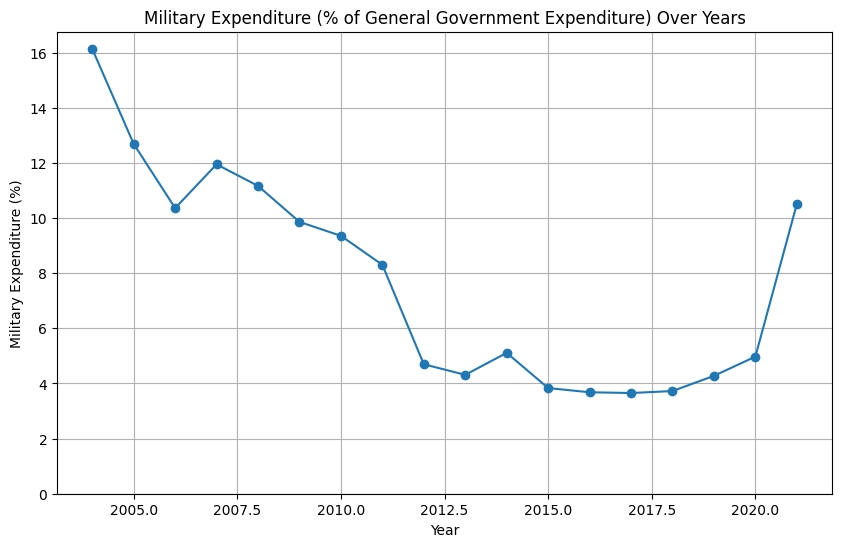

In [8]:
# Plotting line chart for Military Expenditure over the years using the columns 'Year' and 'Value'
# y-axis starting from 0
plt.figure(figsize=(10, 6))
plt.plot(data_military_expenditure['Year'], data_military_expenditure['Value'], marker='o')
plt.title('Military Expenditure (% of General Government Expenditure) Over Years')
plt.xlabel('Year')
plt.ylabel('Military Expenditure (%)')
plt.ylim(bottom=0)
plt.grid(True)
plt.show()

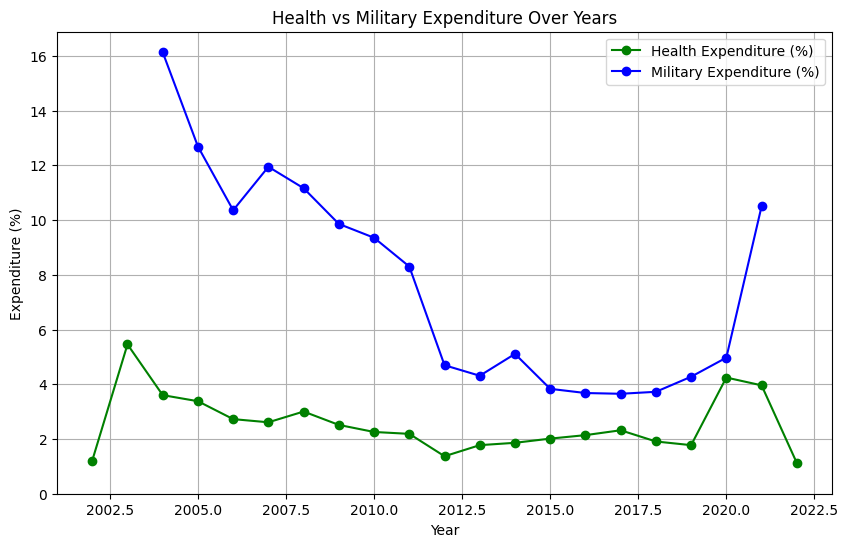

In [9]:
# Plotting two lines: 'Domestic general government health expenditure (% of general government expenditure)' and 'Military expenditure (% of general government expenditure)'
data_health_expenditure = data[data['Indicator Name'] == 'Domestic general government health expenditure (% of general government expenditure)']
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data_health_expenditure['Year'], data_health_expenditure['Value'], marker='o', label='Health Expenditure (%)', color='green')
ax.plot(data_military_expenditure['Year'], data_military_expenditure['Value'], marker='o', label='Military Expenditure (%)', color='blue')
ax.set_title('Health vs Military Expenditure Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Expenditure (%)')
ax.set_ylim(bottom=0)
ax.grid(True)
ax.legend()
plt.show()

In [10]:
# Printing in a file all the unique values of the column 'Indicator Name'
unique_indicators = data['Indicator Name'].unique()
with open('unique_indicators.txt', 'w') as f:
    for indicator in unique_indicators:
        f.write(f"{indicator}\n")


In [16]:
# Selecting only the unique indicators that contain the phrase '(% of GDP)'
gdp_indicators = [indicator for indicator in unique_indicators if '(% of GDP)' in indicator]
print("Indicators related to GDP:")
for indicator in gdp_indicators:
    print(indicator)

my_gdp_indicators = ['Current health expenditure (% of GDP)',
                     'Expense (% of GDP)', 
                     'Government expenditure on education, total (% of GDP)',
                     'Military expenditure (% of GDP)']


Indicators related to GDP:
Agriculture, forestry, and fishing, value added (% of GDP)
Trade in services (% of GDP)
Foreign direct investment, net outflows (% of GDP)
Current account balance (% of GDP)
Foreign direct investment, net inflows (% of GDP)
Personal remittances, received (% of GDP)
Revenue, excluding grants (% of GDP)
Expense (% of GDP)
General government final consumption expenditure (% of GDP)
Households and NPISHs final consumption expenditure (% of GDP)
Final consumption expenditure (% of GDP)
Gross national expenditure (% of GDP)
Exports of goods and services (% of GDP)
Gross fixed capital formation, private sector (% of GDP)
Gross fixed capital formation (% of GDP)
Gross capital formation (% of GDP)
Imports of goods and services (% of GDP)
External balance on goods and services (% of GDP)
Trade (% of GDP)
Manufacturing, value added (% of GDP)
Industry (including construction), value added (% of GDP)
Services, value added (% of GDP)
Gross domestic savings (% of GDP)
Gros

In [17]:
# Grouping by year and summing the 'Value' for each year in the gdp_indicators
gdp_data = data[data['Indicator Name'].isin(my_gdp_indicators)]
gdp_summary = gdp_data.groupby('Year')['Value'].sum().reset_index()
print("GDP-related indicators summary by year:")
print(gdp_summary)

GDP-related indicators summary by year:
      Year       Value
0   1970.0    1.629606
1   1973.0    1.868910
2   1974.0    1.610825
3   1975.0    1.722066
4   1976.0    2.046087
5   1977.0    2.011475
6   2002.0    9.443391
7   2003.0    8.941258
8   2004.0   12.239727
9   2005.0   11.940355
10  2006.0   53.675347
11  2007.0   60.957460
12  2008.0  114.030637
13  2009.0  100.541578
14  2010.0  115.720967
15  2011.0  132.814815
16  2012.0   96.335288
17  2013.0   97.524743
18  2014.0  103.700710
19  2015.0   88.400863
20  2016.0  105.164864
21  2017.0   96.349454
22  2018.0   15.215165
23  2019.0   16.002288
24  2020.0   16.892471
25  2021.0   23.336395
26  2022.0   23.088169


In [18]:
#categories = ['Current health expenditure (% of GDP)', 'Domestic general government health expenditure (% of GDP)',]

# Domestic general government health expenditure (% of general government expenditure)

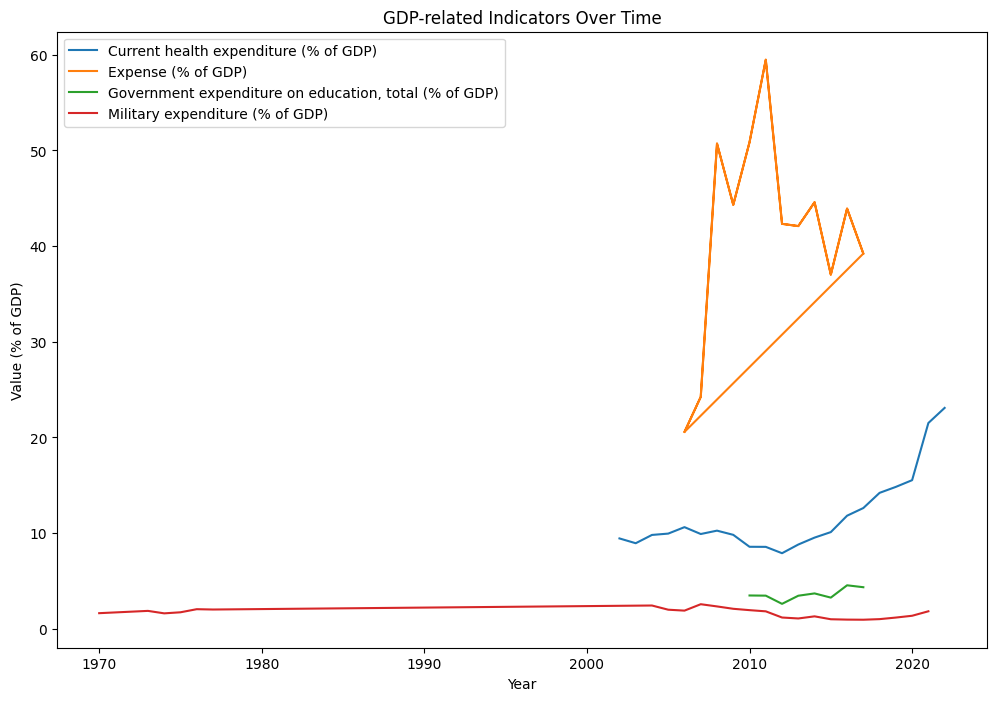

In [19]:
# line plot with all the gdp indicators in my_gdp_indicators
plt.figure(figsize=(12, 8))
for indicator in my_gdp_indicators:
    indicator_data = data[data['Indicator Name'] == indicator]
    plt.plot(indicator_data['Year'], indicator_data['Value'], label=indicator)

plt.xlabel('Year')
plt.ylabel('Value (% of GDP)')
plt.title('GDP-related Indicators Over Time')
plt.legend()
plt.show()

In [ ]:
# https://blogs.worldbank.org/en/endpovertyinsouthasia/where-does-money-go-examining-public-spending-afghanistan